In [15]:
import xgboost as xgb
import pandas as pd
import numpy as np
from datetime import timedelta
from pprint import pprint
import dataframe_image as dfi
import matplotlib.pyplot as plt
import sklearn.metrics as mtr
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance

pd.options.display.max_colwidth = 200

In [16]:
df = pd.read_csv("rota33642.csv")

df["data_partida"] = pd.to_datetime(df["data_partida"])

df = df.sort_values(by=["data_partida"], ascending=True)

df["tempo_viagem_1"] = df["tempo_viagem"]
df["tempo_viagem_2"] = df["tempo_viagem"]
df["tempo_viagem_3"] = df["tempo_viagem"]

df["tempo_viagem_1"] = df["tempo_viagem_1"].shift(1)
df["tempo_viagem_2"] = df["tempo_viagem_2"].shift(2)
df["tempo_viagem_3"] = df["tempo_viagem_3"].shift(3)

df

data_partida         data_chegada  linha  tempo_viagem  \
755  2019-07-01 04:24:03  2019-07-01 04:35:46  33642           703   
2697 2019-07-01 04:49:57  2019-07-01 05:03:18  33642           801   
756  2019-07-01 04:58:33  2019-07-01 05:11:34  33642           781   
1876 2019-07-01 05:07:10  2019-07-01 05:20:11  33642           781   
1161 2019-07-01 05:16:42  2019-07-01 05:29:49  33642           787   
...                  ...                  ...    ...           ...   
6965 2019-09-30 23:30:14  2019-09-30 23:46:47  33642           993   
8004 2019-09-30 23:46:49  2019-10-01 00:00:33  33642           824   
7350 2019-10-01 00:00:45  2019-10-01 00:14:57  33642           852   
6966 2019-10-01 00:16:27  2019-10-01 00:30:36  33642           849   
7351 2019-10-01 00:40:28  2019-10-01 00:51:48  33642           680   

      equipamento  dia_semana  partidaTimeStamp  qtdDiasAno  direcao  \
755          2826           1        1561965843         182        2   
2697        62620           1        1561967397         182        2   
756          2826           1        1561967913         182        2   
1876         3239           1        1561968430         182        2   
1161         2978           1        1561969002         182        2   
...           ...         ...               ...         ...      ...   
6965         2134           1        1569897014         273        2   
8004         3216           1        1569898009         273        2   
7350         2826           2        1569898845         274        2   
6966         2134           2        1569899787         274        2   
7351         2826           2        1569901228         274        2   

      tipo_dia  turno_dia  chegadaTimeStamp  hora  hora_dia  tempo_viagem_1  \
755          1          1        1561966546   NaN         4             NaN   
2697         1          1        1561968198   NaN         4           703.0   
756          1          1        1561968694   NaN         4           801.0   
1876         1          2        1561969211   NaN         5           781.0   
1161         1          2        1561969789   NaN         5           781.0   
...        ...        ...               ...   ...       ...             ...   
6965         1          4        1569898007   NaN        23          1573.0   
8004         1          4        1569898833   NaN        23           993.0   
7350         1          1        1569899697   NaN         0           824.0   
6966         1          1        1569900636   NaN         0           852.0   
7351         1          1        1569901908   NaN         0           849.0   

      tempo_viagem_2  tempo_viagem_3  
755              NaN             NaN  
2697             NaN             NaN  
756            703.0             NaN  
1876           801.0           703.0  
1161           781.0           801.0  
...              ...             ...  
6965           930.0          1063.0  
8004          1573.0           930.0  
7350           993.0          1573.0  
6966           824.0           993.0  
7351           852.0           824.0  

[9314 rows x 17 columns]

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[16:49:13] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:49:13] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:1117.32779
[1]	validation_0-rmse:1063.04472
[2]	validation_0-rm

C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste["predicao_xgb"] = modelo_xgb.predict(x_teste)
C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste["predicao_lr"] = modelo_lr.predict(x_teste)
C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[16:50:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:50:33] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:1169.05502
[1]	validation_0-rmse:1163.36621
[2]	validation_0-rm

C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metrics = pd.DataFrame(np.array([


Fitting 10 folds for each of 40 candidates, totalling 400 fits
[16:52:06] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:52:06] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:1169.47454
[1]	validation_0-rmse:1163.78631
[2]	validation_0-rm

C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metrics = pd.DataFrame(np.array([


Fitting 10 folds for each of 40 candidates, totalling 400 fits
[16:53:52] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:53:52] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:1170.09795
[1]	validation_0-rmse:1164.40605
[2]	validation_0-rm

C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metrics = pd.DataFrame(np.array([


Fitting 10 folds for each of 40 candidates, totalling 400 fits
[16:55:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:55:39] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:1161.43512
[1]	validation_0-rmse:1155.77162
[2]	validation_0-rm

C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste["predicao_xgb"] = modelo_xgb.predict(x_teste)
C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste["predicao_lr"] = modelo_lr.predict(x_teste)
C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[16:57:48] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:57:48] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:1161.55796
[1]	validation_0-rmse:1155.89114
[2]	validation_0-rm

C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metrics = pd.DataFrame(np.array([


Fitting 10 folds for each of 40 candidates, totalling 400 fits
[17:00:24] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:00:25] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:1161.77390
[1]	validation_0-rmse:1156.10883
[2]	validation_0-rm

C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metrics = pd.DataFrame(np.array([


Fitting 10 folds for each of 40 candidates, totalling 400 fits
[17:03:22] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:03:23] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:1162.09118
[1]	validation_0-rmse:1156.42319
[2]	validation_0-rm

C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metrics = pd.DataFrame(np.array([


Fitting 10 folds for each of 40 candidates, totalling 400 fits
[17:06:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:06:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:1172.33725
[1]	validation_0-rmse:1160.87672
[2]	validation_0-rm

C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste["predicao_xgb"] = modelo_xgb.predict(x_teste)
C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste["predicao_lr"] = modelo_lr.predict(x_teste)
C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[17:09:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:09:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:1178.22692
[1]	validation_0-rmse:1172.47963
[2]	validation_0-rm

C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metrics = pd.DataFrame(np.array([


Fitting 10 folds for each of 40 candidates, totalling 400 fits
[17:12:45] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:12:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:1178.37791
[1]	validation_0-rmse:1172.63074
[2]	validation_0-rm

C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metrics = pd.DataFrame(np.array([


Fitting 10 folds for each of 40 candidates, totalling 400 fits
[17:16:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:16:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:1178.60177
[1]	validation_0-rmse:1172.85292
[2]	validation_0-rm

C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metrics = pd.DataFrame(np.array([


Fitting 10 folds for each of 40 candidates, totalling 400 fits
[17:20:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:20:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:1178.95890
[1]	validation_0-rmse:1173.19914
[2]	validation_0-rm

C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste["predicao_xgb"] = modelo_xgb.predict(x_teste)
C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste["predicao_lr"] = modelo_lr.predict(x_teste)
C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[17:24:52] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:24:53] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:1179.03251
[1]	validation_0-rmse:1173.27416
[2]	validation_0-rm

C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metrics = pd.DataFrame(np.array([


Fitting 10 folds for each of 40 candidates, totalling 400 fits
[17:29:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:29:39] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:1179.14346
[1]	validation_0-rmse:1173.38699
[2]	validation_0-rm

C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metrics = pd.DataFrame(np.array([


Fitting 10 folds for each of 40 candidates, totalling 400 fits
[17:35:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:35:06] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:1179.31276
[1]	validation_0-rmse:1173.55441
[2]	validation_0-rm

C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metrics = pd.DataFrame(np.array([


Fitting 10 folds for each of 40 candidates, totalling 400 fits
[17:40:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:40:16] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:1179.68362
[1]	validation_0-rmse:1173.91704
[2]	validation_0-rm

C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste["predicao_xgb"] = modelo_xgb.predict(x_teste)
C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste["predicao_lr"] = modelo_lr.predict(x_teste)
C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[17:45:06] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:45:07] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:1179.74568
[1]	validation_0-rmse:1173.98773
[2]	validation_0-rm

C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metrics = pd.DataFrame(np.array([


Fitting 10 folds for each of 40 candidates, totalling 400 fits
[17:50:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:50:29] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:1179.83271
[1]	validation_0-rmse:1174.07024
[2]	validation_0-rm

C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metrics = pd.DataFrame(np.array([


Fitting 10 folds for each of 40 candidates, totalling 400 fits
[17:56:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:56:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stop_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:1174.16109
[1]	validation_0-rmse:1162.67827
[2]	validation_0-rm

C:\Users\leovi\AppData\Local\Temp/ipykernel_28168/3588231736.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metrics = pd.DataFrame(np.array([


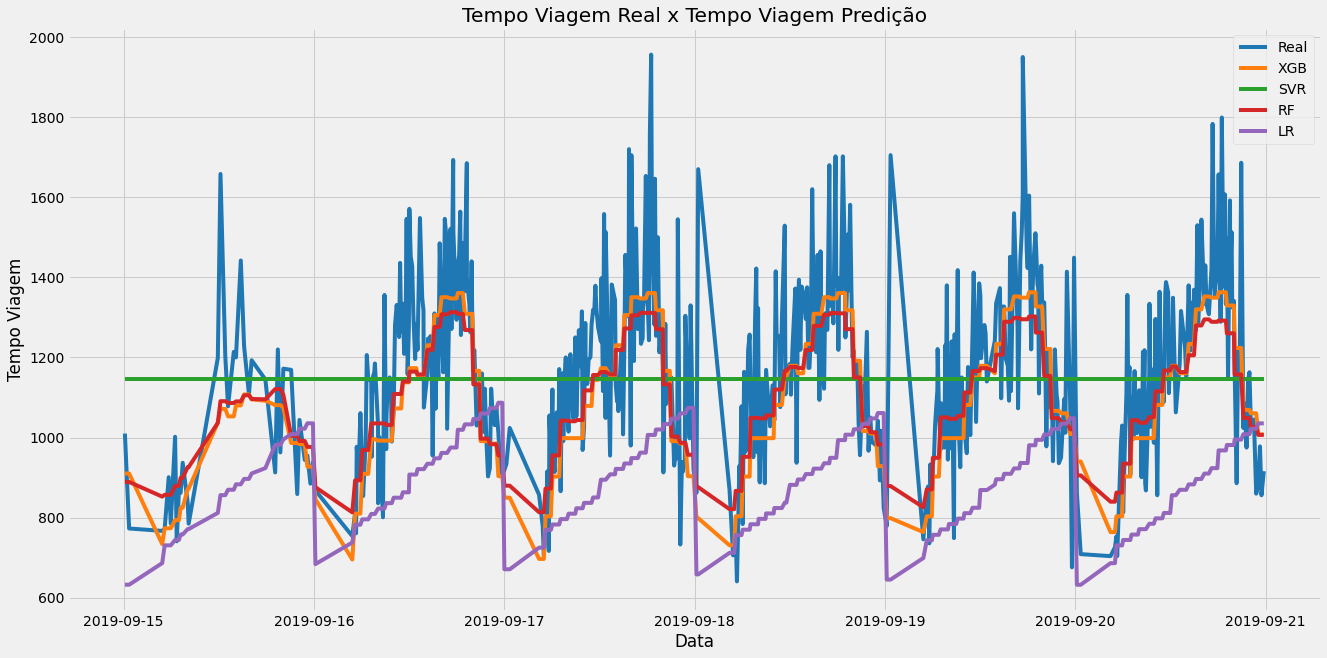

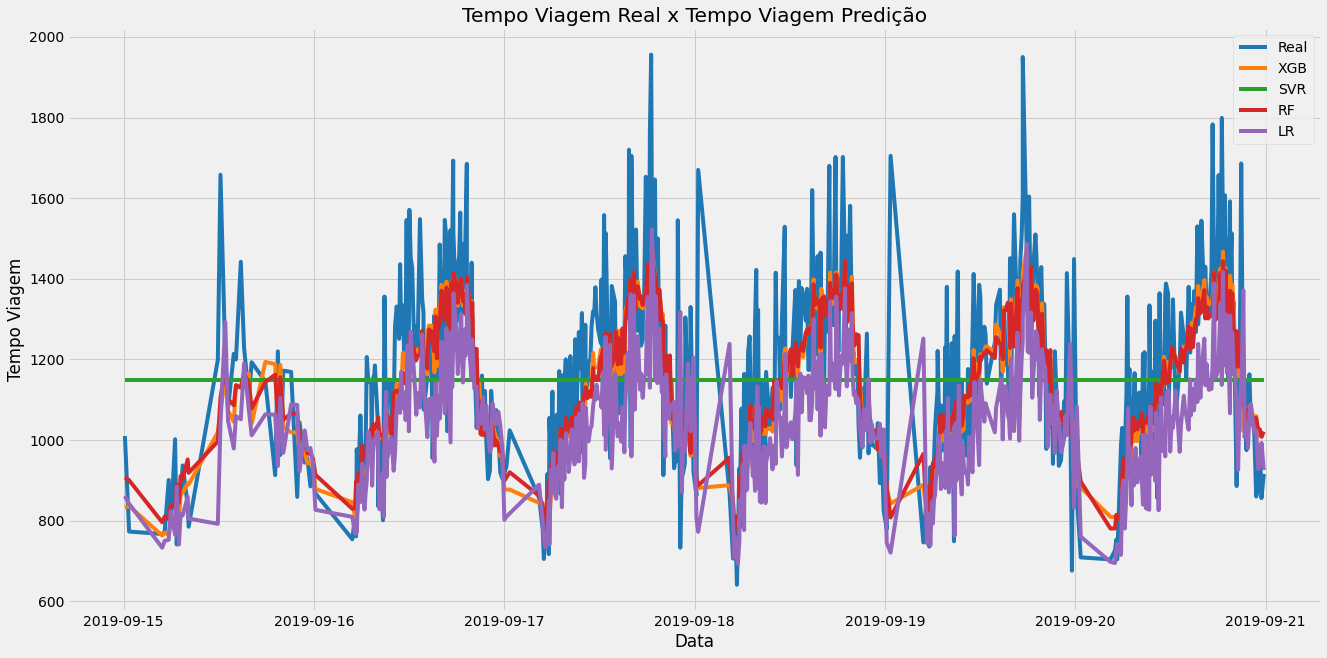

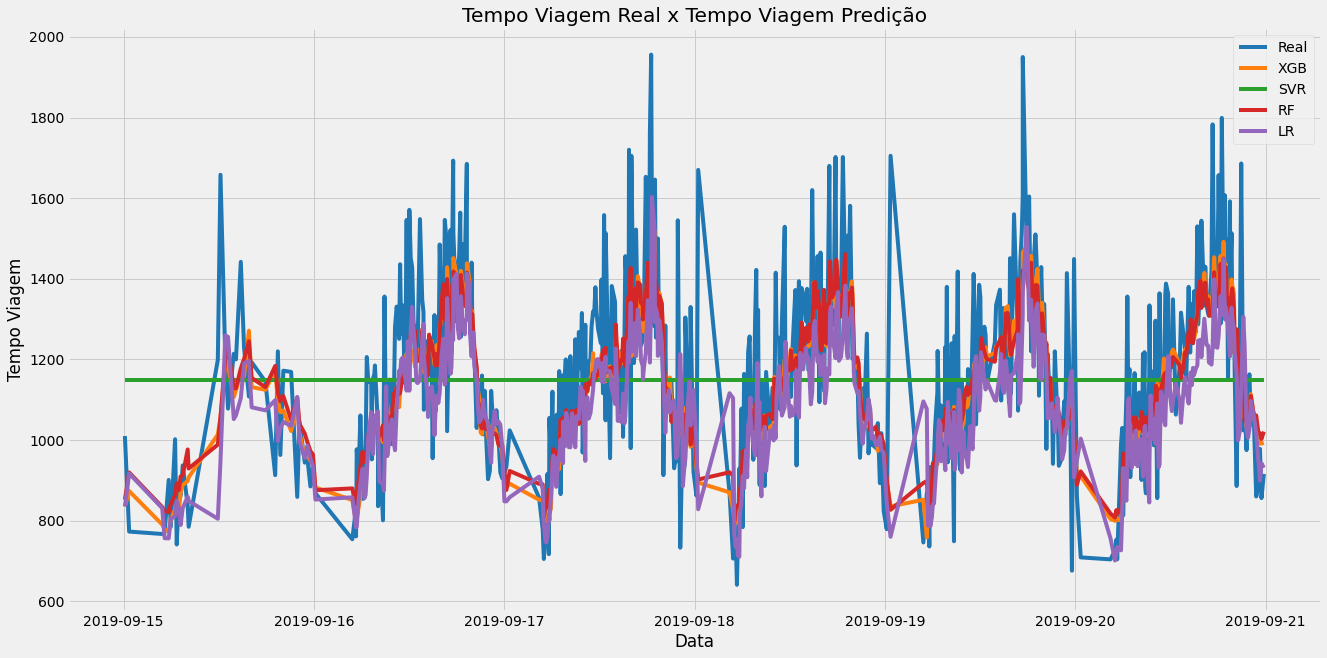

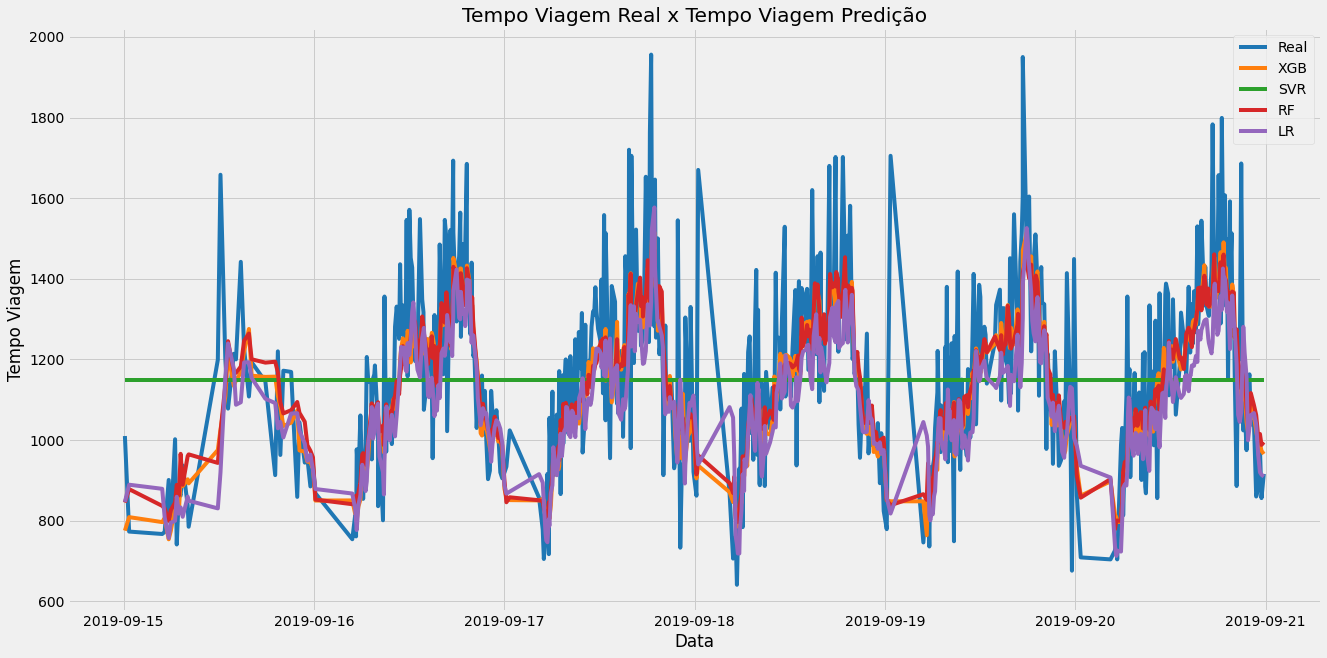

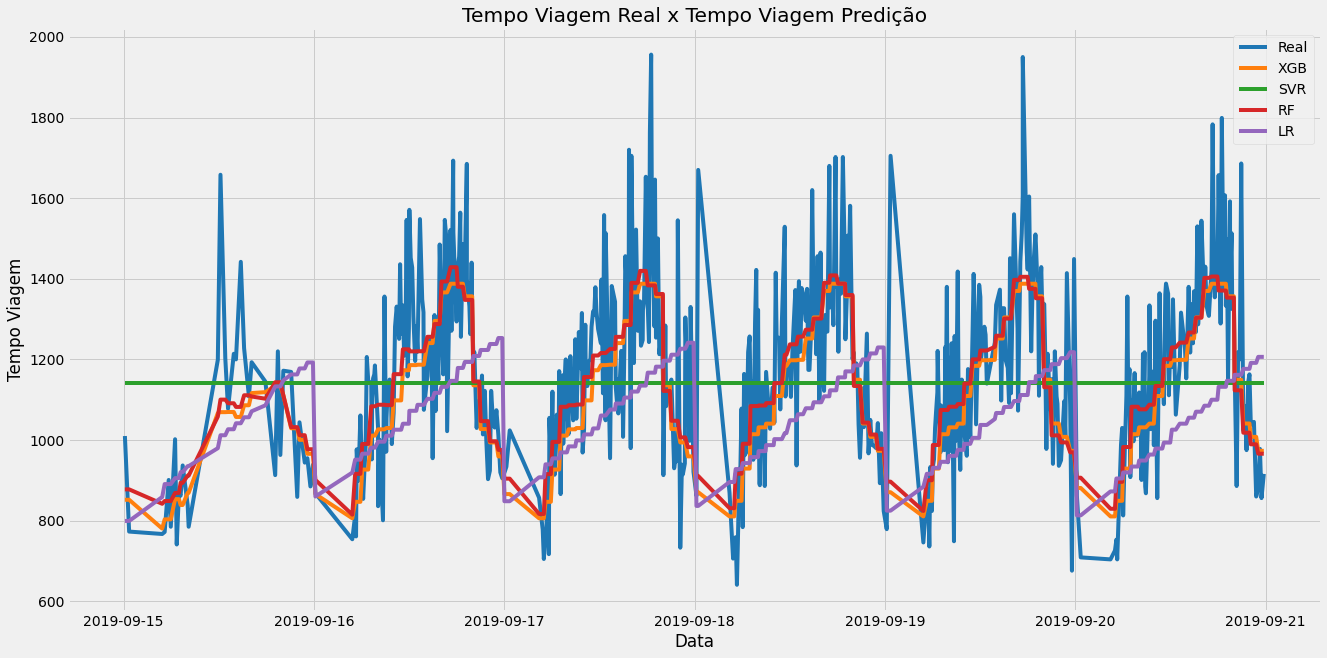

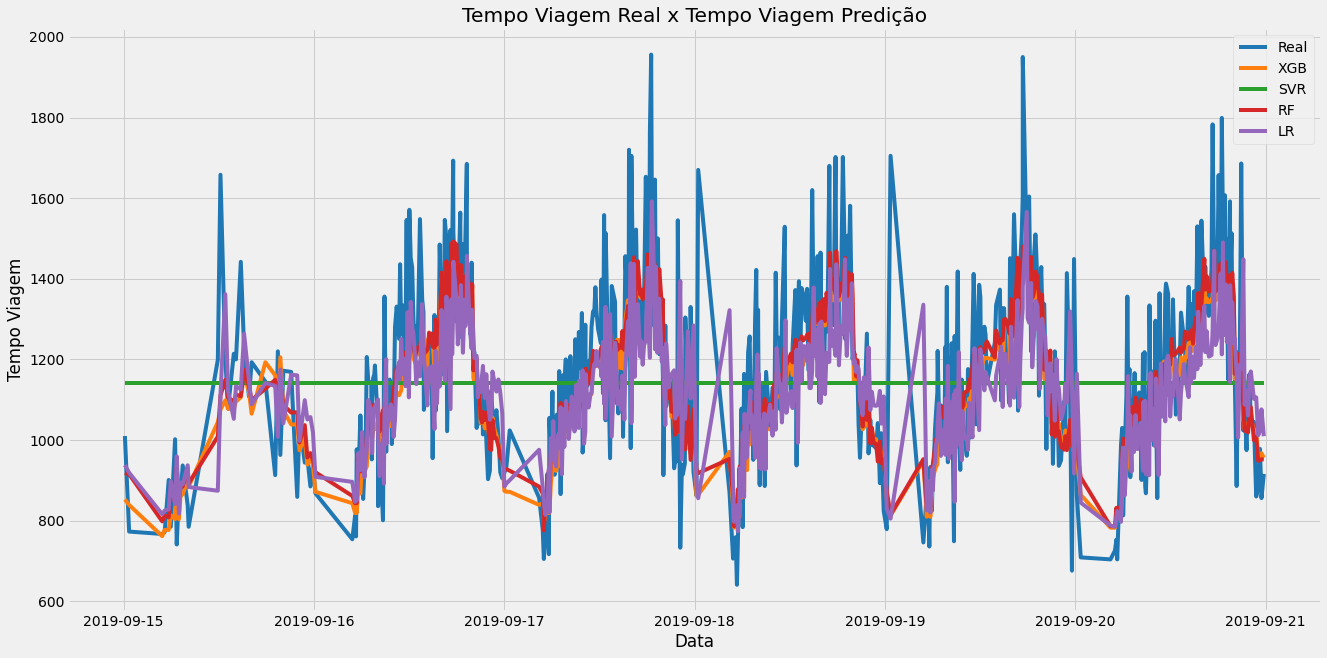

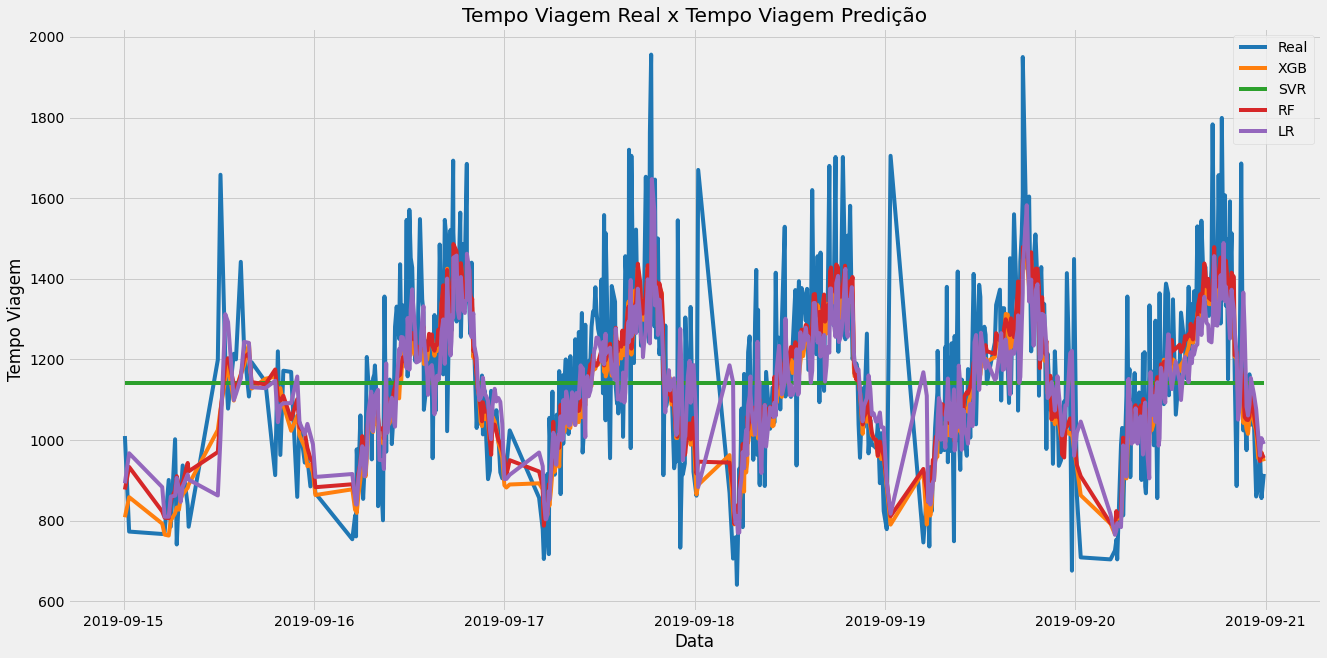

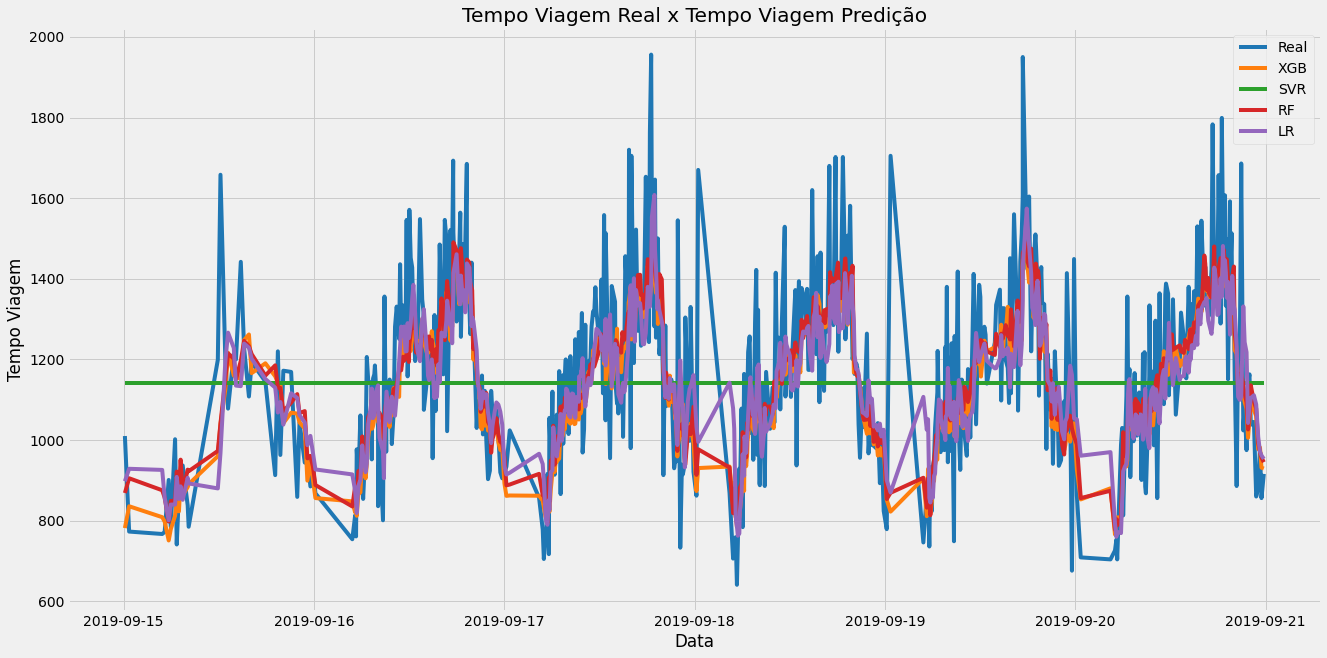

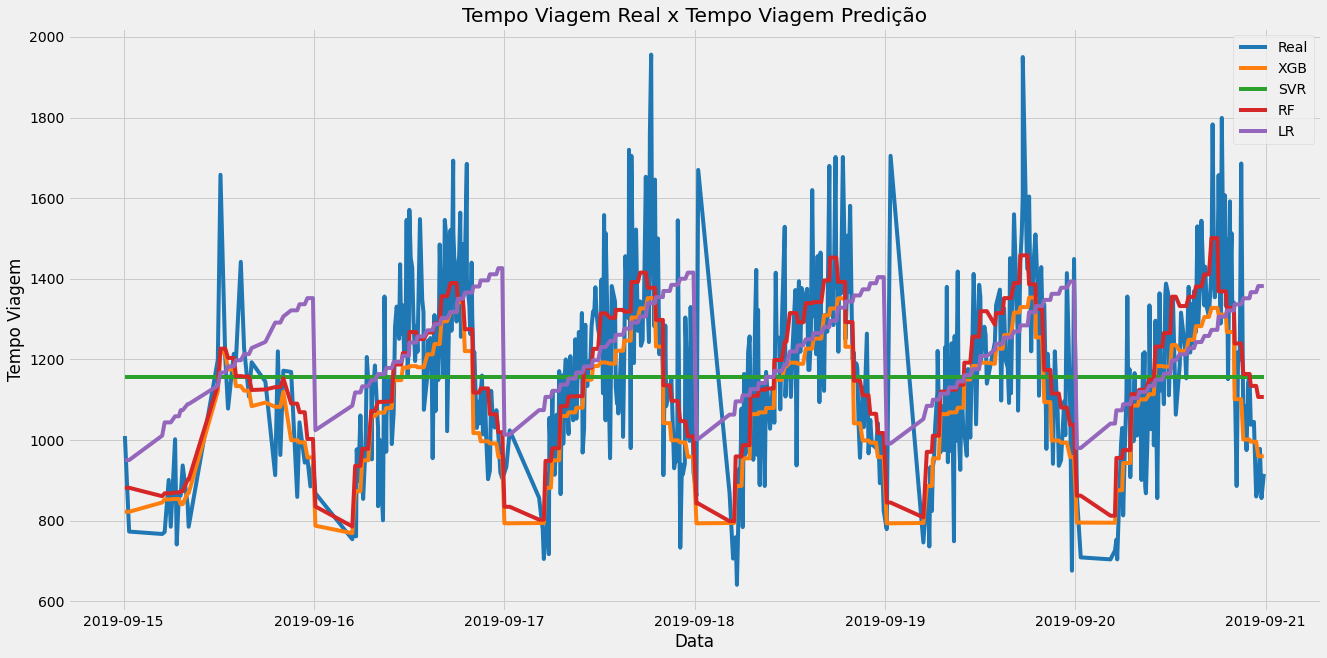

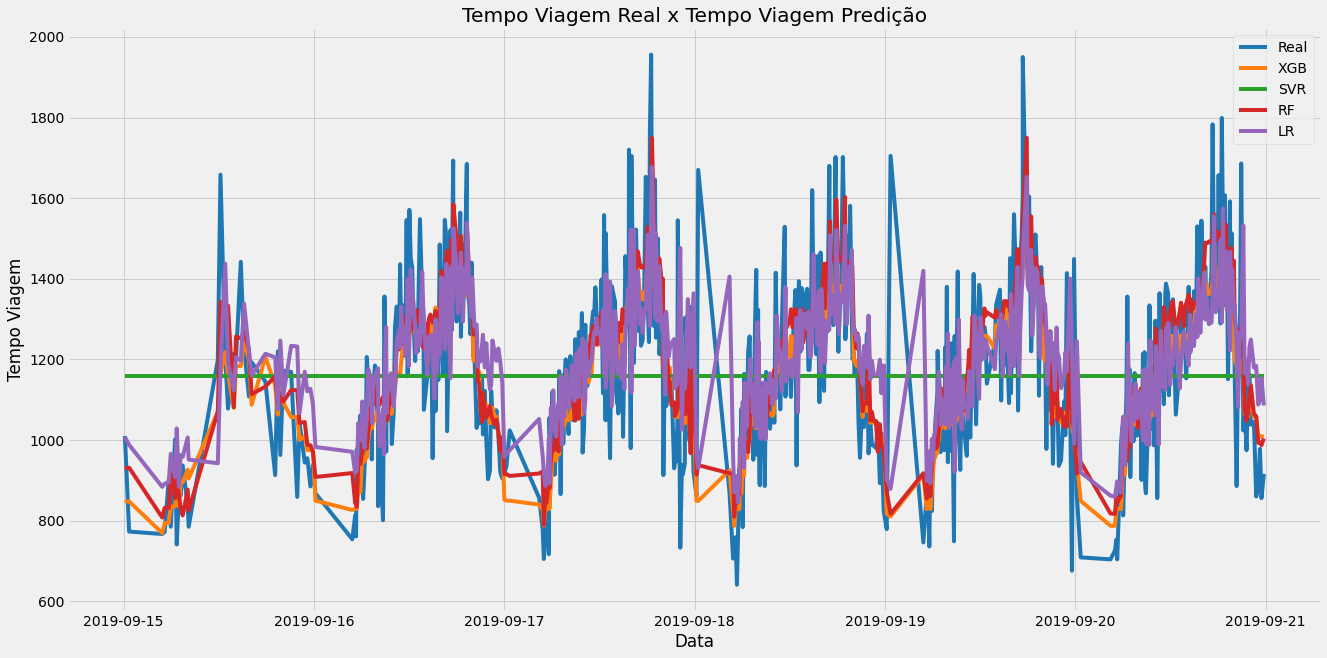

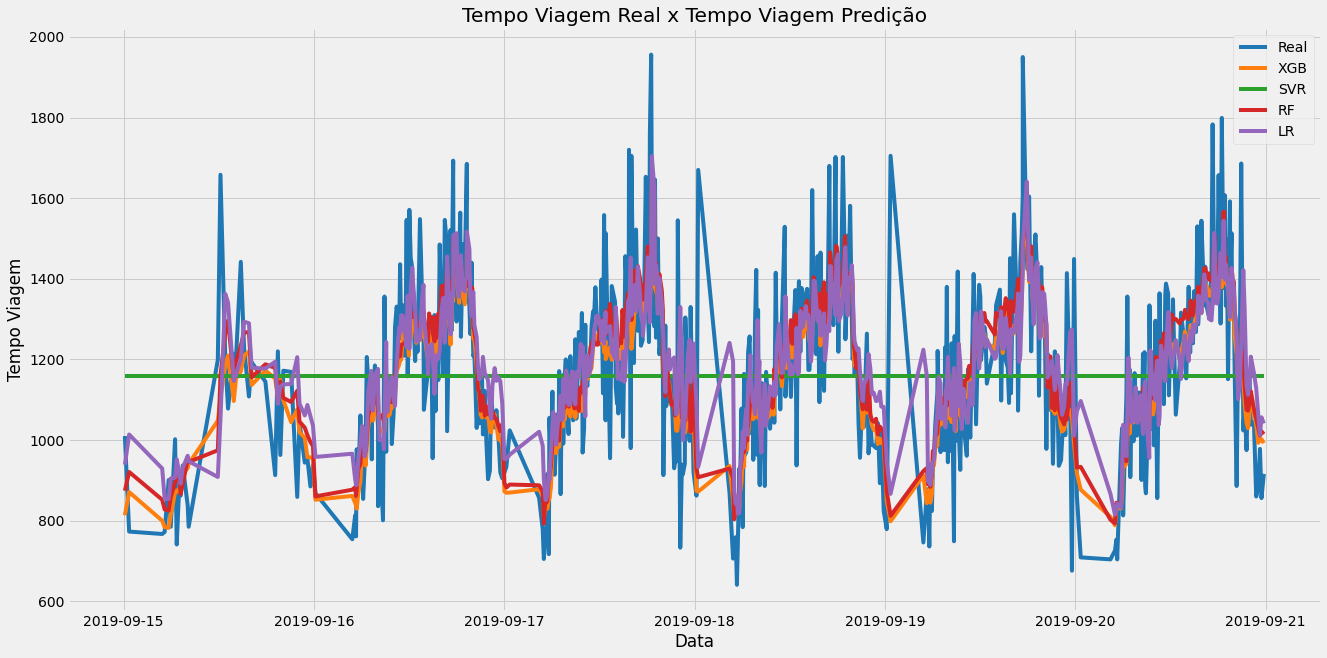

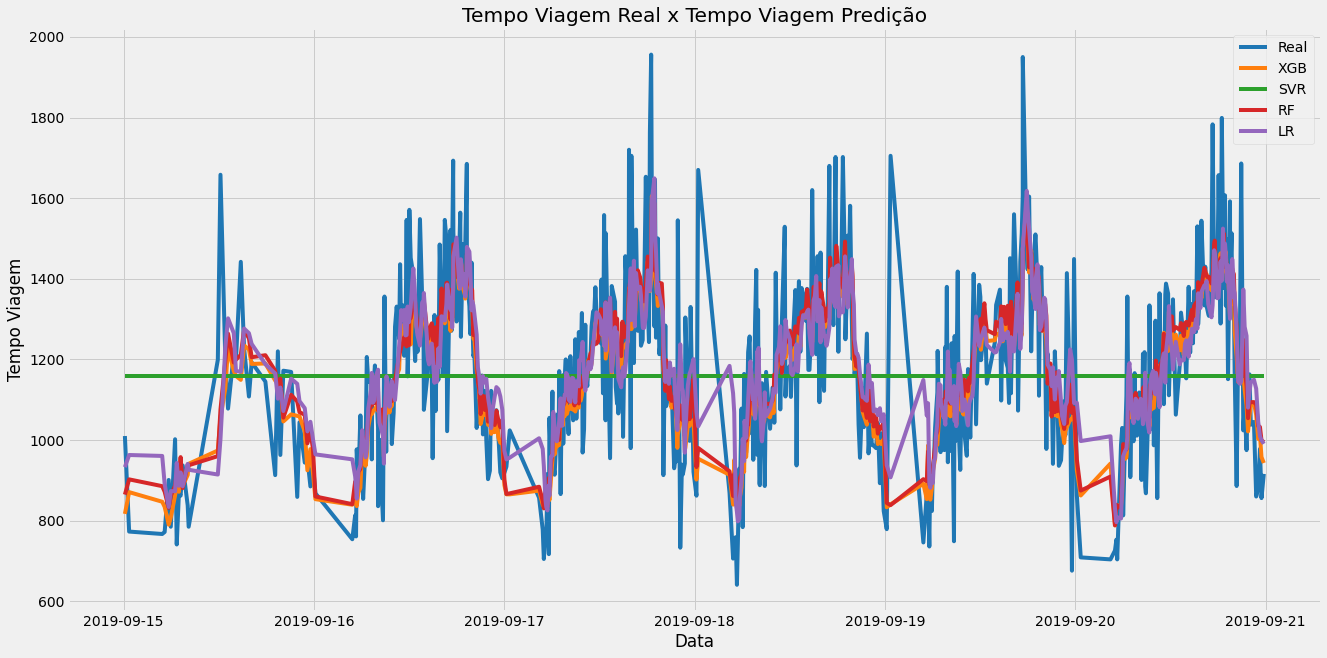

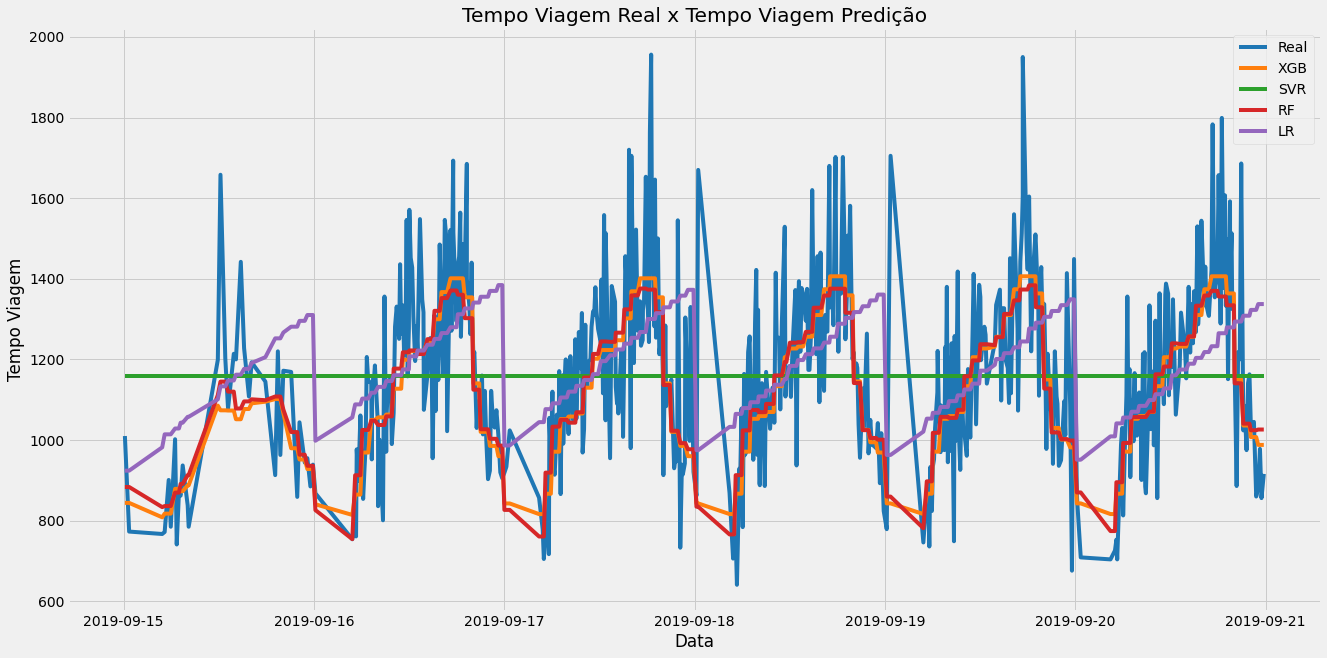

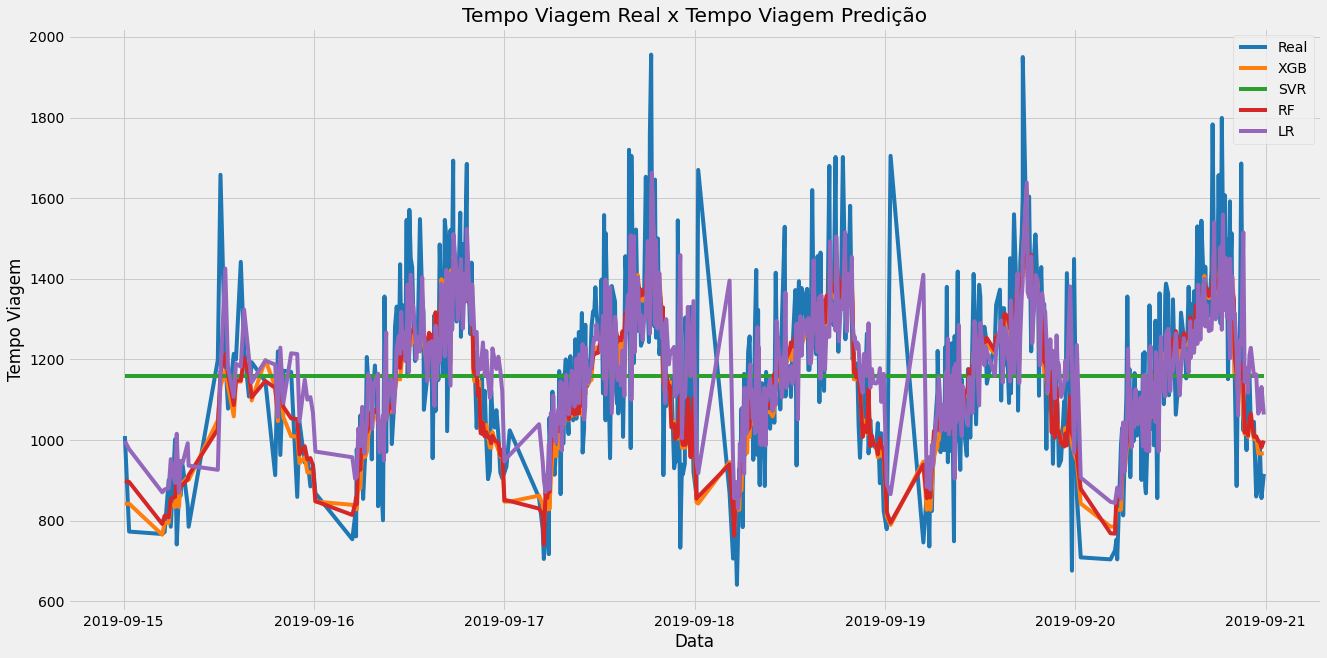

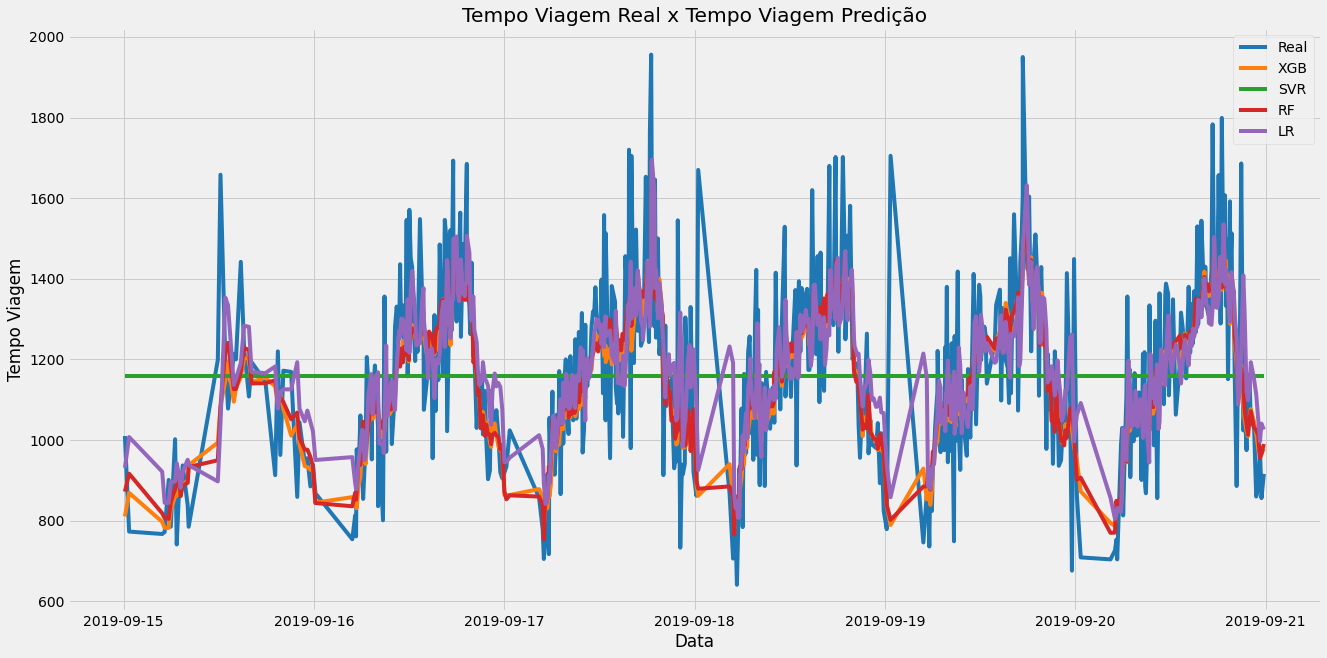

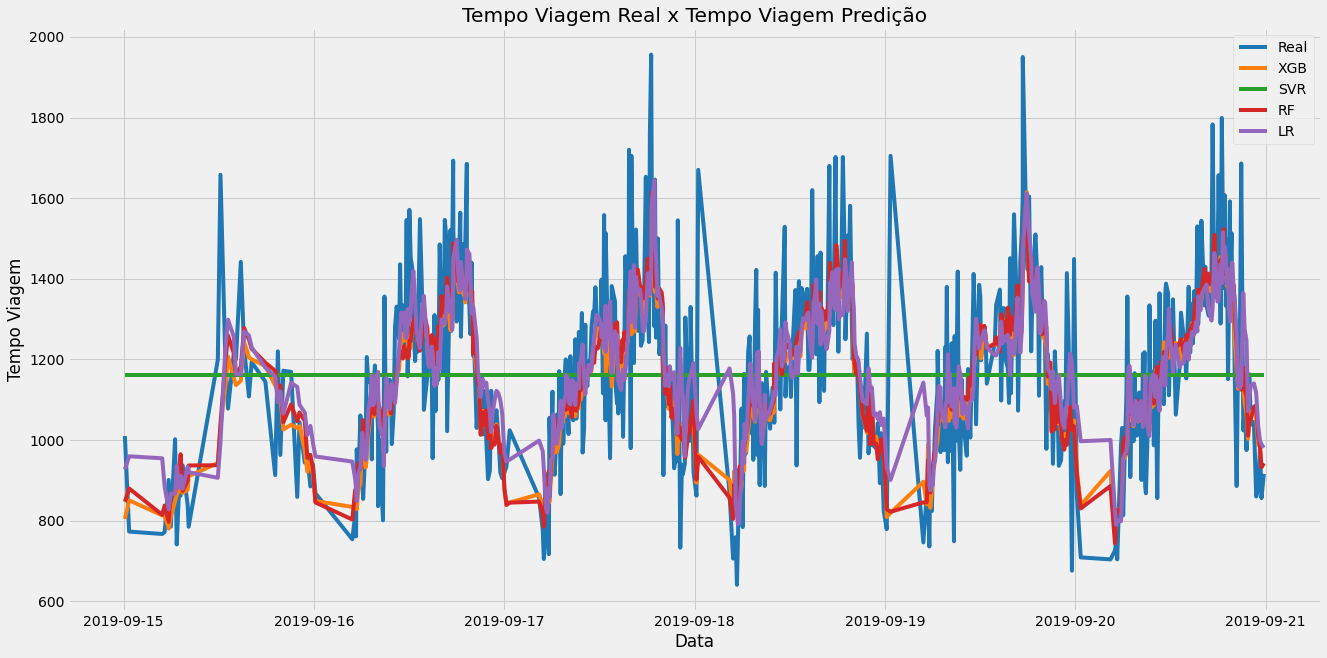

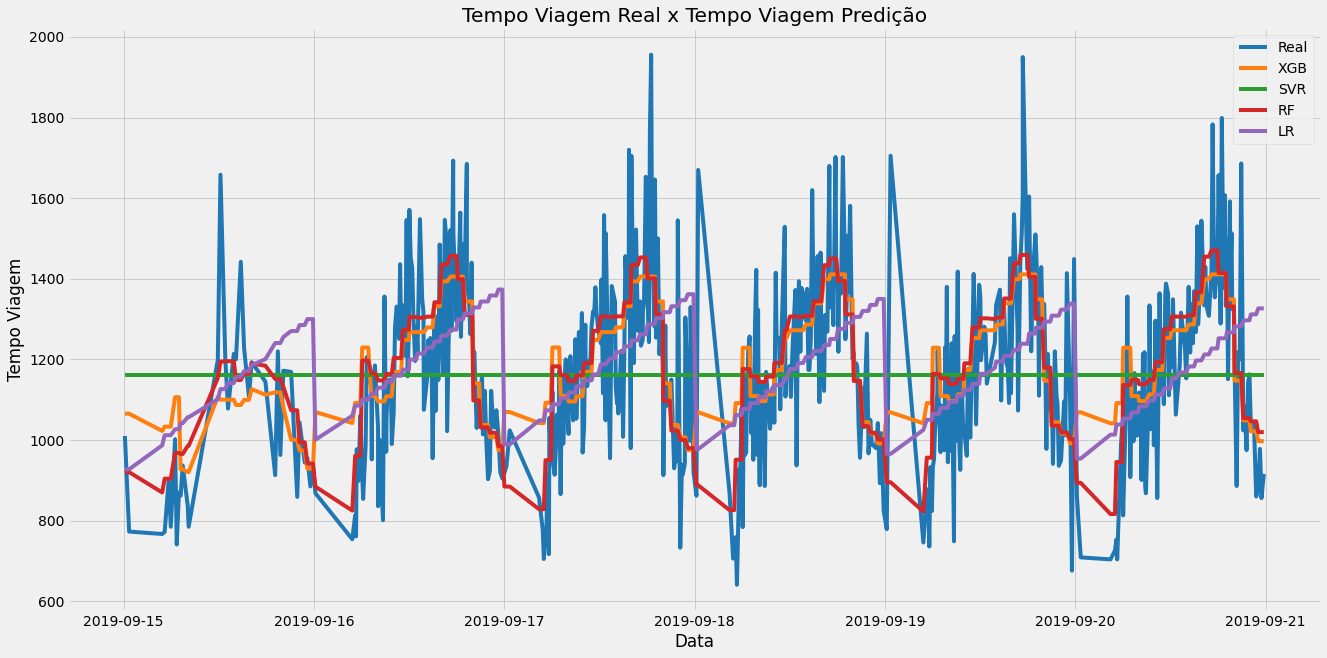

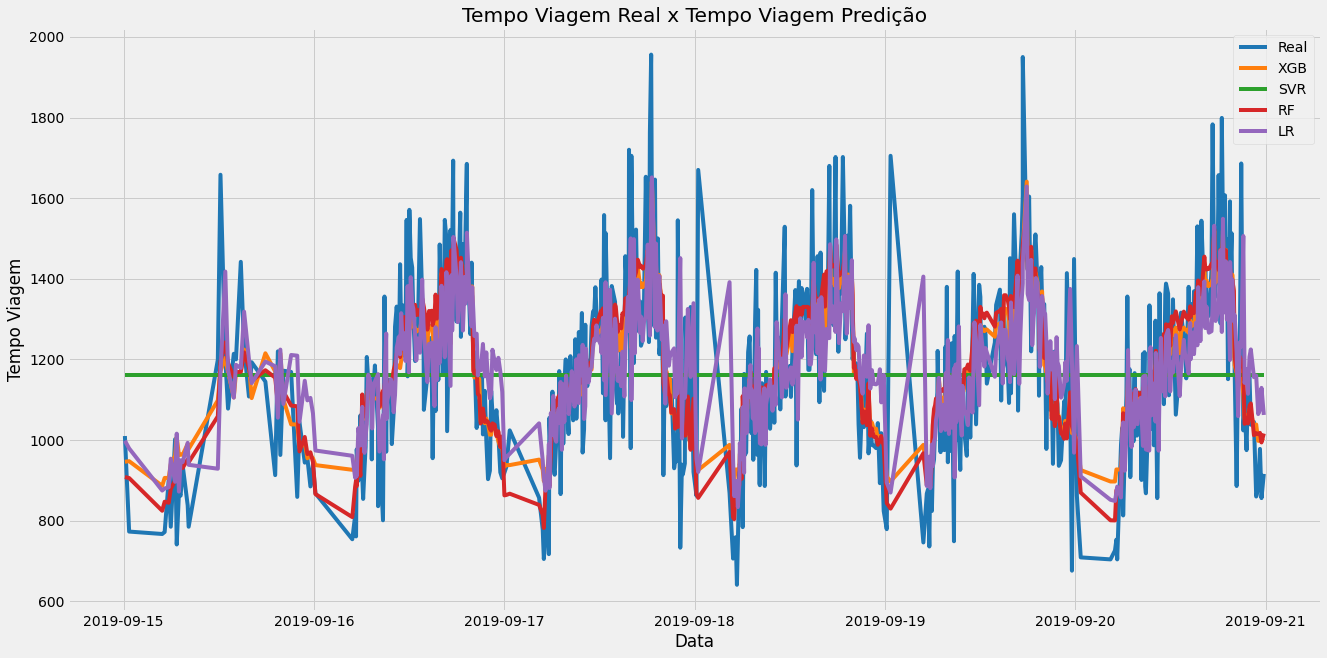

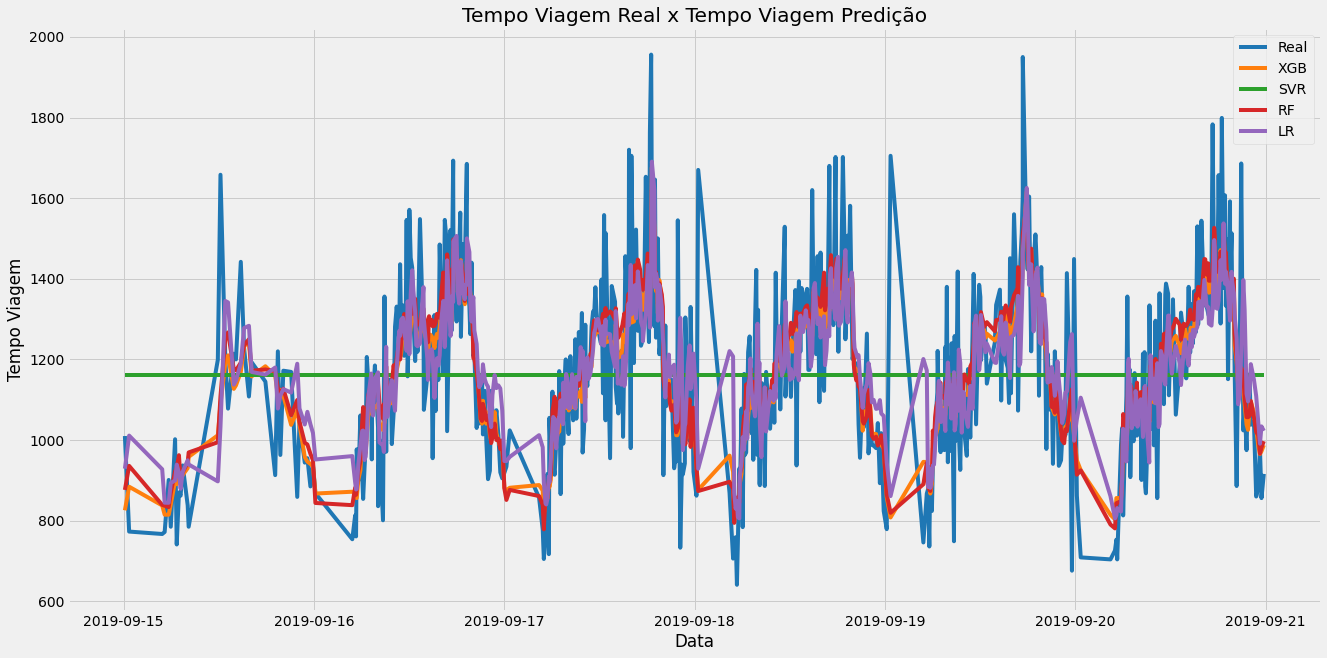

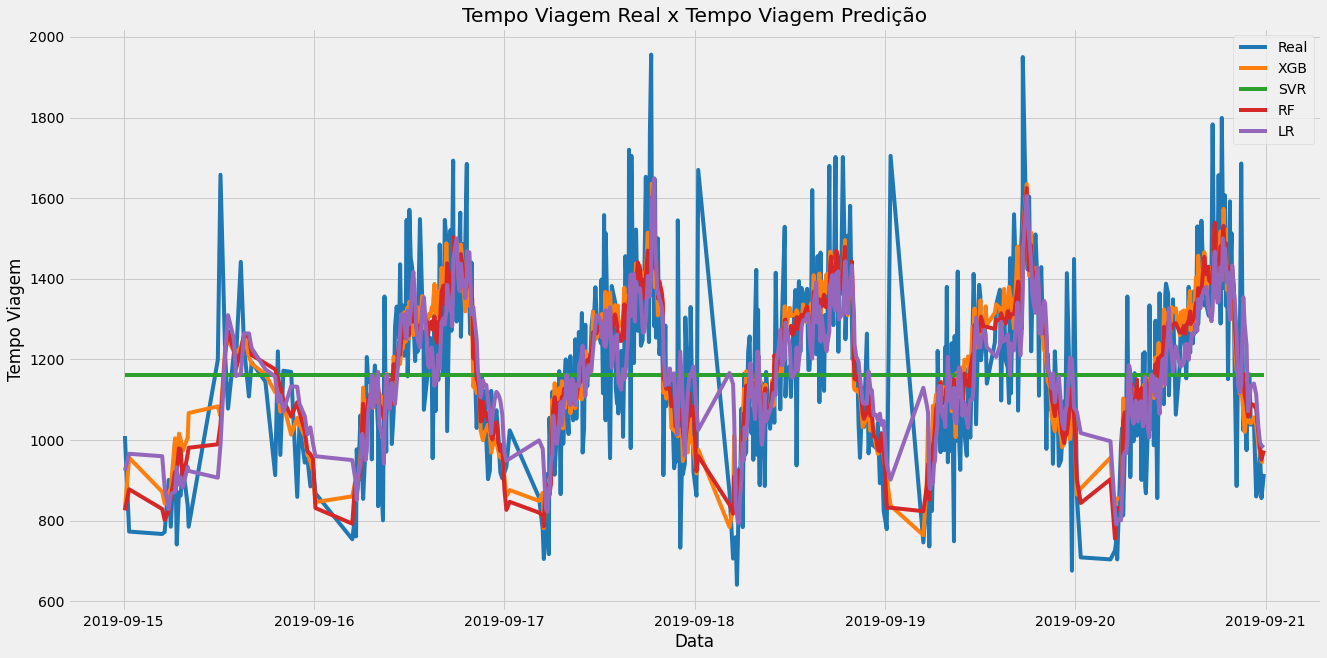

In [17]:
data_atual = df["data_partida"].dt.date.min() + timedelta(days=14)
dias_teste = 14
dias_treino = 79

while data_atual < (df["data_partida"].dt.date.max() - timedelta(days=14)):
        df_teste = df[df["data_partida"].dt.date > data_atual]
        df_treino = df[df["data_partida"].dt.date <= data_atual]

        for cenario in range(0, 4):
                if cenario == 0:
                        x_teste = df_teste[["partidaTimeStamp", "dia_semana", "tipo_dia", "hora_dia", "turno_dia"]]
                        y_teste = df_teste["tempo_viagem"]
                        x_treino = df_treino[["partidaTimeStamp", "dia_semana", "tipo_dia", "hora_dia", "turno_dia"]]
                        y_treino = df_treino["tempo_viagem"]

                elif cenario == 1:
                        df_teste = df_teste.iloc[1:]
                        df_treino = df_treino.iloc[1:]

                        x_teste = df_teste[["partidaTimeStamp", "dia_semana", "tipo_dia", "hora_dia", "turno_dia", "tempo_viagem_1"]]
                        y_teste = df_teste["tempo_viagem"]
                        x_treino = df_treino[["partidaTimeStamp", "dia_semana", "tipo_dia", "hora_dia", "turno_dia", "tempo_viagem_1"]]
                        y_treino = df_treino["tempo_viagem"]
                
                elif cenario == 2:
                        df_teste = df_teste.iloc[2:]
                        df_treino = df_treino.iloc[2:]

                        x_teste = df_teste[["partidaTimeStamp", "dia_semana", "tipo_dia", "hora_dia", "turno_dia", "tempo_viagem_1", "tempo_viagem_2"]]
                        y_teste = df_teste["tempo_viagem"]
                        x_treino = df_treino[["partidaTimeStamp", "dia_semana", "tipo_dia", "hora_dia", "turno_dia", "tempo_viagem_1", "tempo_viagem_2"]]
                        y_treino = df_treino["tempo_viagem"]
                
                else:
                        df_teste = df_teste.iloc[3:]
                        df_treino = df_treino.iloc[3:]

                        x_teste = df_teste[["partidaTimeStamp", "dia_semana", "tipo_dia", "hora_dia", "turno_dia", "tempo_viagem_1", "tempo_viagem_2", "tempo_viagem_3"]]
                        y_teste = df_teste["tempo_viagem"]
                        x_treino = df_treino[["partidaTimeStamp", "dia_semana", "tipo_dia", "hora_dia", "turno_dia", "tempo_viagem_1", "tempo_viagem_2", "tempo_viagem_3"]]
                        y_treino = df_treino["tempo_viagem"]
                

                # Hyperparâmetros do XGBoosting
                params_xgb = {
                        "n_estimators": list(range(100, 1100, 100)), #Number of gradient boosted trees. Equivalent to number of boosting rounds
                        "max_depth": list(range(2, 15)),#Maximum tree depth for base learners.
                        "min_child_weight": list(range(1, 11)),#Minimum sum of instance weight(hessian) needed in a child.
                        "learning_rate": [0.3, 0.2, 0.1, 0.05, 0.01, 0.005],#Boosting learning rate (xgb’s “eta”)
                        "gamma": np.arange(0, 0.7, 0.1)#Minimum loss reduction required to make a further partition on a leaf node of the tree.
                        }

                # Hyperparâmetros do Random Forest
                params_rf = {
                        "n_estimators": list(range(100, 1100, 100)),#The number of trees in the forest.
                        "bootstrap": [True, False],#Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
                        "max_depth": list(range(2, 15)),#The maximum depth of the tree.
                        "max_features": [1.0, "sqrt", "log2"],#The number of features to consider when looking for the best split:
                        "min_samples_leaf": list(range(1, 11)),#The minimum number of samples required to split an internal node
                        "min_samples_split": list(range(2, 11)),#The minimum number of samples required to be at a leaf node.
                        }

                # Hyperparâmetros do SVR
                params_svr = {
                        "C": [0.1, 1, 10, 100, 1000], #Regularization parameter. The strength of the regularization is inversely proportional to C
                        "gamma": ["scale", "auto"],#Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
                        }

                #Linear Regression não tem hyper parametrização


                #Criação e fit do modelo XGB
                modelo_xgb = xgb.XGBRegressor(early_stop_rounds = 100)
                xgb_rand_search = RandomizedSearchCV(modelo_xgb, params_xgb, scoring="neg_mean_squared_error", n_iter=40, verbose=True, cv=10, n_jobs=-1, random_state=123)
                xgb_rand_search.fit(x_treino, y_treino)
                modelo_xgb = xgb_rand_search.best_estimator_

                modelo_xgb.fit(x_treino, y_treino, eval_set = [(x_treino, y_treino)])


                #Criação e fit do modelo Random Forest
                modelo_rf = RandomForestRegressor()
                rf_rand_search = RandomizedSearchCV(modelo_rf, params_rf, scoring="neg_mean_squared_error", n_iter=40, verbose=True, cv=10, n_jobs=-1, random_state=123)
                rf_rand_search.fit(x_treino, y_treino)
                modelo_rf = rf_rand_search.best_estimator_

                modelo_rf.fit(x_treino, y_treino)


                #Criação e fit do modelo SVR
                modelo_svr = SVR(kernel = 'rbf')
                svr_rand_search = RandomizedSearchCV(modelo_svr, params_svr, scoring="neg_mean_squared_error", n_iter=10, verbose=True, cv=10, n_jobs=-1, random_state=123)
                svr_rand_search.fit(x_treino, y_treino)
                modelo_svr = svr_rand_search.best_estimator_

                modelo_svr.fit(x_treino, y_treino)


                #Criação e fit do modelo Linear Regression
                modelo_lr = LinearRegression()
                modelo_lr.fit(x_treino, y_treino)

                df_teste["predicao_xgb"] = modelo_xgb.predict(x_teste)
                df_teste["predicao_lr"] = modelo_lr.predict(x_teste)
                df_teste["predicao_rf"] = modelo_rf.predict(x_teste)
                df_teste["predicao_svr"] = modelo_svr.predict(x_teste)


                RRSE_xgb = np.sqrt(sum((df_teste["tempo_viagem"] - df_teste["predicao_xgb"]) ** 2) / sum((df_teste["tempo_viagem"] - np.mean(df_teste["tempo_viagem"])) ** 2))
                RMSE_xgb = mtr.mean_squared_error(df_teste["tempo_viagem"], df_teste["predicao_xgb"], squared=False) 
                MAPE_xgb = mtr.mean_absolute_percentage_error(df_teste["tempo_viagem"], df_teste["predicao_xgb"])

                RRSE_rf = np.sqrt(sum((df_teste["tempo_viagem"] - df_teste["predicao_rf"]) ** 2) / sum((df_teste["tempo_viagem"] - np.mean(df_teste["tempo_viagem"])) ** 2))
                RMSE_rf = mtr.mean_squared_error(df_teste["tempo_viagem"], df_teste["predicao_rf"], squared=False) 
                MAPE_rf = mtr.mean_absolute_percentage_error(df_teste["tempo_viagem"], df_teste["predicao_rf"])

                RRSE_svr = np.sqrt(sum((df_teste["tempo_viagem"] - df_teste["predicao_svr"]) ** 2) / sum((df_teste["tempo_viagem"] - np.mean(df_teste["tempo_viagem"])) ** 2))
                RMSE_svr = mtr.mean_squared_error(df_teste["tempo_viagem"], df_teste["predicao_svr"], squared=False) 
                MAPE_svr = mtr.mean_absolute_percentage_error(df_teste["tempo_viagem"], df_teste["predicao_svr"])

                RRSE_lr = np.sqrt(sum((df_teste["tempo_viagem"] - df_teste["predicao_lr"]) ** 2) / sum((df_teste["tempo_viagem"] - np.mean(df_teste["tempo_viagem"])) ** 2))
                RMSE_lr = mtr.mean_squared_error(df_teste["tempo_viagem"], df_teste["predicao_lr"], squared=False) 
                MAPE_lr = mtr.mean_absolute_percentage_error(df_teste["tempo_viagem"], df_teste["predicao_lr"])


                metrics = pd.DataFrame(np.array([
                        [RRSE_xgb, RRSE_rf, RRSE_svr, RRSE_lr, x_teste.columns.values],
                        [RMSE_xgb, RMSE_rf, RMSE_svr, RMSE_lr, x_teste.columns.values],
                        [MAPE_xgb, MAPE_rf, MAPE_svr, MAPE_lr, x_teste.columns.values]
                        ]),columns=['XGBoosting','Random Forest','Support Vector Regression','Linear Regression', 'Colunas'], index=['RRSE','RMSE', 'MAPE'])
                
                dfi.export(metrics, f"Images/Metrics/metrics_33642_{dias_teste}_{dias_treino}_cen_{cenario}.jpg")


                plt.style.use("fivethirtyeight")
                
                plt.figure(figsize=(20, 10))
                
                plt.xlabel("Data")
                plt.ylabel("Tempo Viagem")
                plt.title("Tempo Viagem Real x Tempo Viagem Predição")

                df_plot_predicao = df_teste[(df_teste["data_partida"] > "2019-09-15") & (df_teste["data_partida"] < "2019-09-21")]

                plt.plot(df_plot_predicao["data_partida"], df_plot_predicao["tempo_viagem"], color="#1f77b4", label="Real")
                plt.plot(df_plot_predicao["data_partida"], df_plot_predicao["predicao_xgb"], color="#ff7f0e", label="XGB")
                plt.plot(df_plot_predicao["data_partida"], df_plot_predicao["predicao_svr"], color="#2ca02c", label="SVR")
                plt.plot(df_plot_predicao["data_partida"], df_plot_predicao["predicao_rf"], color="#d62728", label="RF")
                plt.plot(df_plot_predicao["data_partida"], df_plot_predicao["predicao_lr"], color="#9467bd", label="LR")
                plt.legend()

                plt.savefig(f"Images/Results/33642_line_charth_{dias_teste}_{dias_treino}_cen_{cenario}.jpg")

        dias_teste += 14
        dias_treino -= 14

        data_atual += timedelta(days=14)